In [1]:
# Want to..
# - correlate ecDNA z-score against DNTTIP2 status
# - correlate ecDNA z-score against cell embeddings

In [41]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import os
os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/2021-08-31_correlate-ecDNA-status')

In [123]:
SAMPLE="RCMB56-ht"
ECDNA=str(1)

poisson_tbl="../2021-08-17_featurecounts-permutation-2/"+SAMPLE+"_ecDNA"+ECDNA+"_poisson.tsv"
gene_tbl="../2021-08-29_seurat/"+SAMPLE+"_dnttip2.sct.tsv"
atac_embeddings_tbl="../2021-08-29_seurat/"+SAMPLE+"_seurat_atac_cell_embeddings.tsv"
rna_embeddings_tbl="../2021-08-29_seurat/"+SAMPLE+"_seurat_rna_cell_embeddings.tsv"

(0.16335898635040114, 6.711259301277487e-23)

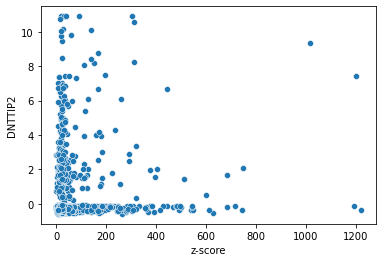

In [120]:
def correlate_gene_expression(poisson_tbl,gene_tbl):
    p = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    p=p["z-score"]
    #p=np.log2(p+2)
    g = pd.read_csv(gene_tbl,sep='\t',index_col=1)
    g=g["DNTTIP2"]
    df = pd.concat([p,g],axis=1,join='inner')
    sns.scatterplot(data=df,x='z-score',y='DNTTIP2')
    return scipy.stats.pearsonr(df['z-score'],df['DNTTIP2'])
correlate_gene_expression(poisson_tbl,gene_tbl)

[0.24622210295567254, -0.37403275017619525, -0.294342768759063, 0.06411911652632787, -0.2123165728775612, -0.06167113299568094, 0.015738152055494104, -0.04933450522515114, 0.4238609082647651, 0.07648363117843407]
Component 8 has the greatest correlation.


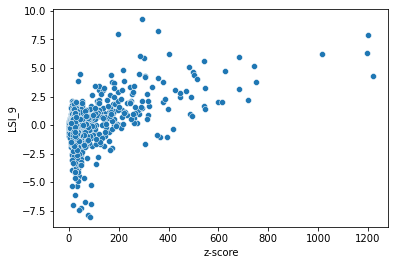

In [121]:
def correlate_rna_pcs(poisson_tbl,embeddings_tbl):
    p = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    p=p["z-score"]
    #p=np.log2(p+2)
    e = pd.read_csv(embeddings_tbl,sep='\t',index_col=0)
    # align indices
    i = pd.concat([p,e],axis=1,join='inner').index
    p = p[i]
    e = e.loc[list(i)]
    correlations = [scipy.stats.pearsonr(p,e.iloc[:,i])[0] for i in range(10)]
    print(correlations)
    i = np.argmax(np.abs(correlations))
    print("Component {} has the greatest correlation.".format(i))
    df = pd.concat([p,e.iloc[:,i]],axis=1,join='inner')
    sns.scatterplot(data=df,x=df.columns[0],y=df.columns[1])
    return
correlate_rna_pcs(poisson_tbl,atac_embeddings_tbl)

[0.2071242276743811, -0.3013193068534167, 0.1055877347258943, -0.13756794762993113, 0.026085005195324758, 0.033496729513110717, 0.0006639085182073783, 0.014207016691149855, 0.003510235113611081, -0.05018022168874041]
Component 1 has the greatest correlation.


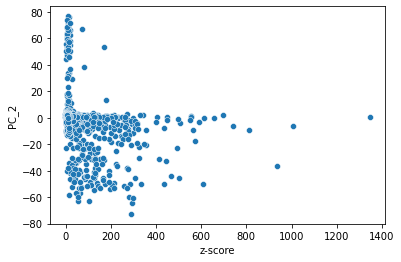

In [124]:
correlate_rna_pcs(poisson_tbl,rna_embeddings_tbl)